# Filter methods

Rank the features according to some criterium, e.g. distance, information gain, dependency, consistency. Then by choosing only the top-ranked features, we hope to learn a better model.

In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from matplotlib import pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score, r2_score
from faraway.datasets import seatpos
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
df = seatpos.load()

In [7]:
df

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
0,46,180,187.2,184.9,95.2,36.1,45.3,41.3,-206.300
1,31,175,167.5,165.5,83.8,32.9,36.5,35.9,-178.210
2,23,100,153.6,152.2,82.9,26.0,36.6,31.0,-71.673
3,19,185,190.3,187.4,97.3,37.4,44.1,41.0,-257.720
4,23,159,178.0,174.1,93.9,29.5,40.1,36.9,-173.230
5,47,170,178.7,177.0,92.4,36.0,43.2,37.4,-185.150
6,30,137,165.7,164.6,87.7,32.5,35.6,36.2,-164.750
7,28,192,185.3,182.7,96.9,35.8,39.9,43.1,-270.920
8,23,150,167.6,165.0,91.4,29.4,35.5,33.4,-151.780
9,29,120,161.2,158.7,85.2,26.6,31.0,32.8,-113.880


In [9]:
df.corr()

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
Age,1.000000,0.080685,-0.079297,-0.090128,-0.170204,0.359511,0.091286,-0.042331,0.205172
Weight,0.080685,1.000000,0.828177,0.828526,0.775627,0.697552,0.572614,0.784257,-0.640333
HtShoes,-0.079297,0.828177,1.000000,0.998148,0.929675,0.751953,0.724862,0.908433,-0.796596
Ht,-0.090128,0.828526,0.998148,1.000000,0.928228,0.752142,0.734960,0.909752,-0.798927
Seated,-0.170204,0.775627,0.929675,0.928228,1.000000,0.625196,0.607091,0.811914,-0.731254
Arm,0.359511,0.697552,0.751953,0.752142,0.625196,1.000000,0.671098,0.753814,-0.585095
Thigh,0.091286,0.572614,0.724862,0.734960,0.607091,0.671098,1.000000,0.649541,-0.591202
Leg,-0.042331,0.784257,0.908433,0.909752,0.811914,0.753814,0.649541,1.000000,-0.787169
hipcenter,0.205172,-0.640333,-0.796596,-0.798927,-0.731254,-0.585095,-0.591202,-0.787169,1.000000


In [15]:
np.abs(df.corr()['hipcenter'])

Age          0.205172
Weight       0.640333
HtShoes      0.796596
Ht           0.798927
Seated       0.731254
Arm          0.585095
Thigh        0.591202
Leg          0.787169
hipcenter    1.000000
Name: hipcenter, dtype: float64

In [16]:
def data(keep=None):
    global train_X, train_y, valid_X, valid_y, train_df, valid_df
    if keep is None:
        keep = list(df.columns.drop('hipcenter'))
    train_df, valid_df = train_test_split(df[keep + ['hipcenter']], test_size=0.5)
    train_X = train_df.drop(columns='hipcenter')
    train_y = train_df.hipcenter
    valid_X = valid_df.drop(columns='hipcenter')
    valid_y = valid_df.hipcenter
    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    valid_X = scaler.transform(valid_X)

In [17]:
r2s = []
for i in range(1000):
    data()
    model = LinearRegression()
    model.fit(train_X, train_y)
    pred_y = model.predict(valid_X)
    r2s.append(r2_score(valid_y, pred_y))
sum(r2s)/len(r2s)

0.08592321051717097

In [30]:
df.corr()['hipcenter']

Age          0.205172
Weight      -0.640333
HtShoes     -0.796596
Ht          -0.798927
Seated      -0.731254
Arm         -0.585095
Thigh       -0.591202
Leg         -0.787169
hipcenter    1.000000
Name: hipcenter, dtype: float64

In [31]:
r2s = []
for i in range(1000):
    data(keep=['Weight', 'Ht'])
    model = LinearRegression()
    model.fit(train_X, train_y)
    pred_y = model.predict(valid_X)
    r2s.append(r2_score(valid_y, pred_y))
sum(r2s)/len(r2s)

0.5070004463142394

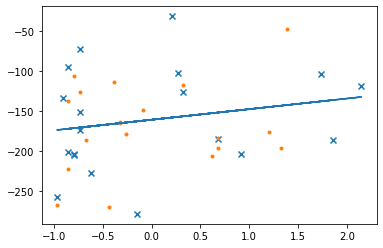

In [79]:
plt.scatter(train_X, train_y, marker='x')
plt.scatter(valid_X, valid_y, marker='.')
plt.plot(train_X, model.predict(train_X));

The data function keeps only the given features in the dataset.

In [22]:
data()

In [23]:
def model_summary():
    """
    report the F-Test scores and VIF scores for the remaining variables
    """
    X2 = sm.add_constant(train_X)
    est = sm.OLS(train_y, X2)
    m = est.fit()
    print(m.summary())
    vif = pd.DataFrame()
    vif["vif"] = [variance_inflation_factor(train_X, i) for i in range(train_X.shape[1])]
    vif["features"] = train_df.drop(columns='hipcenter').columns
    print(vif)

In [285]:
def model_validation_r2():
    """
    train a model and return the r2 score on the validation set
    """
    X2 = sm.add_constant(train_X)
    est = sm.OLS(train_y, X2)
    m = est.fit()
    X2 = sm.add_constant(valid_X)
    pred_y = m.predict(X2)
    return r2_score(valid_y, pred_y)

Because the dataset is really small, we need to bootstrap the experiment to get a more or less stable estimation of r2. We therefore repeat the experience 1000 times, resampling the dataset, learning an optimal model on the training set, computing r2 on the validation set and then taking the average of all r2's.

In [25]:
df.columns

Index(['Age', 'Weight', 'HtShoes', 'Ht', 'Seated', 'Arm', 'Thigh', 'Leg',
       'hipcenter'],
      dtype='object')

In [29]:
data(['Age', 'Weight', 'Ht'])

$ \frac{1}{1-R^2} $

In [28]:
model_summary()

                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     4.375
Date:                Tue, 06 Oct 2020   Prob (F-statistic):             0.0149
Time:                        09:57:02   Log-Likelihood:                -92.027
No. Observations:                  19   AIC:                             200.1
Df Residuals:                      11   BIC:                             207.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -182.8043      9.260    -19.742      0.0

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


We will learn a linear regression model using the statsmodel, because this has a summary function that helps us to analyse which features have a significant contribution to the prediction. For this, we use the `F-Test`, which in the columns below is the 4-th columns ( Probability >|T| ). This so called p-value indicates how likely it is that the contribution of a feature is random. It is common to dismiss anything above 0.05.

The summary shows that although the F-test for the regression function as a whole is significant ( 1.31E-5 ), no feature has a significant contribution. This is caused by collinearity. Columns 5 and 6 indicate a 95% confidence interval for the coefficients, which are very large and can all have positive or negative signs. This is strange, how can a feature be both contributing positively AND negatively?

Note that the warning indicates there may be strong collinearity present!

In [237]:
exp(['HtShoes'])

avg validation r2:  0.22178214514788896


In [249]:
exp(['Seated', 'HtShoes', 'Thigh', 'Arm', 'Leg', 'Weight'])

avg validation r2:  0.4476154865175942


In [250]:
model_summary()

                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     31.50
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           8.74e-08
Time:                        20:22:37   Log-Likelihood:                -147.32
No. Observations:                  30   AIC:                             300.6
Df Residuals:                      27   BIC:                             304.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -168.4238      6.321    -26.645      0.0

In [162]:
train_df.corr()

,Age,Weight,Ht,Seated,Arm,Thigh,Leg,hipcenter
Age,1.000000,0.004359,-0.223846,-0.255888,0.193044,0.057571,-0.142485,0.292628
Weight,0.004359,1.000000,0.775337,0.709538,0.614127,0.552714,0.780087,-0.608630
Ht,-0.223846,0.775337,1.000000,0.912519,0.700325,0.728640,0.895856,-0.797398
Seated,-0.255888,0.709538,0.912519,1.000000,0.569021,0.583649,0.792619,-0.713065
Arm,0.193044,0.614127,0.700325,0.569021,1.000000,0.695021,0.737951,-0.605728
Thigh,0.057571,0.552714,0.728640,0.583649,0.695021,1.000000,0.615700,-0.556330
Leg,-0.142485,0.780087,0.895856,0.792619,0.737951,0.615700,1.000000,-0.780044
hipcenter,0.292628,-0.608630,-0.797398,-0.713065,-0.605728,-0.556330,-0.780044,1.000000


In [191]:
data(['Ht', 'Seated', 'Leg', 'Thigh', 'Arm'])

In [192]:
model()
vif()

                            OLS Regression Results                            
Dep. Variable:              hipcenter   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     14.27
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           0.000115
Time:                        20:04:56   Log-Likelihood:                -90.692
No. Observations:                  19   AIC:                             189.4
Df Residuals:                      15   BIC:                             193.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -157.3286      7.391    -21.286      0.0

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


,vif,features
0,1.062788,Age
1,3.847365,Weight
2,3.729984,HtShoes


In [90]:
model().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              hipcenter   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     13.24
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           5.04e-07
Time:                        19:24:50   Log-Likelihood:                -187.47
No. Observations:                  38   AIC:                             386.9
Df Residuals:                      32   BIC:                             396.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        314.2850     83.522      3.763      0.001     144.157     484.413
Age            0.9604      0.490      1.959      0.059      -0.038       1.959
Weight        -0.1243      0.281     -0.442      0.662      -0.697       0.449
Arm           -2.2570      3.650     -0.618      0.541      -9.692       5.178
Thigh         -2.1683      2.202     -0.984      0.332      -6.655       2.318
Leg           -9.2977      3.678     -2.528      0.017     -16.789      -1.806
==============================================================================
Omnibus:                        1.334   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.263
Skew:                           0.408   Prob(JB):                        0.532
Kurtosis:                       2.635   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
vif()

,vif,features
0,9.767946,Age
1,40.198227,Weight
2,394.644699,Arm
3,191.002985,Thigh
4,356.198808,Leg
